In [1]:
##Importing all required library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#importing our csv file
dataset = pd.read_csv(r'H2HBABBA2251.csv')

#To check if there are any null values
dataset.isnull().sum()

# since column area_business is null so removing it
dataset = dataset.drop(columns = ["area_business"])

#converting required columns in date time format
dataset["document_create_date"]= pd.to_datetime(dataset["document_create_date"],format = "%Y%m%d")

dataset["document_create_date.1"]= pd.to_datetime(dataset["document_create_date.1"],format = "%Y%m%d")

dataset["due_in_date"]= pd.to_datetime(dataset["due_in_date"],format = "%Y%m%d")

dataset["baseline_create_date"]= pd.to_datetime(dataset["baseline_create_date"],format = "%Y%m%d")

dataset['clear_date']=pd.to_datetime(dataset['clear_date'],format='%Y-%m-%d  %H:%M:%S')

#Converting buisness year from float to int
dataset['buisness_year'] = dataset['buisness_year'].astype(int)

#Drop duplicate values
dataset = dataset.drop_duplicates()


In [2]:
#checking if bothe the columns are equal or not
dataset['doc_id'].equals(dataset['invoice_id'])

False

In [3]:
#Checking null values
dataset.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9706
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   4
isOpen                       0
dtype: int64

In [4]:
#Drop null values from invoice id
dataset.dropna(subset=['invoice_id'],inplace=True)

In [5]:
#Check if both the columns are equal or not
dataset['doc_id'].equals(dataset['invoice_id'])

True

In [6]:
#Dropping one of the above column because of similar data
dataset = dataset.drop(columns = ["doc_id"])

In [7]:
#Checking unique values
n=dataset.nunique(axis=0)
print(n)

business_code                 6
cust_number                1403
name_customer              4166
clear_date                  400
buisness_year                 2
posting_date                504
document_create_date        506
document_create_date.1      504
due_in_date                 550
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44270
baseline_create_date        506
cust_payment_terms           74
invoice_id                48839
isOpen                        2
dtype: int64


In [8]:
#Dropping constant value columns
dataset = dataset.drop(columns = ["posting_id","document type"])

In [9]:
#Sorting posting date in ascending order
dataset=dataset.sort_values(by='posting_date')
dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
25732,U001,0200769623,WAL-MAR,2019-01-09,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17093.74,2018-12-30,NAH4,1.928533e+09,0
35918,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,14428.46,2018-12-30,NAH4,1.928541e+09,0
17290,U001,0200707822,PUBLI us,2019-01-14,2019,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,16801.80,2018-12-30,NAA8,1.928542e+09,0
17429,U001,0200769623,WAL-MAR in,2019-01-10,2019,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,38102.65,2018-12-30,NAH4,1.928543e+09,0
42566,U001,0200799538,UNITE corporation,2019-01-15,2019,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,1113.85,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46674,U001,0200464724,LAND,NaT,2020,2020-05-19,2020-05-19,2020-05-19,2020-05-29,USD,194864.00,2020-05-19,NA10,1.930914e+09,1
15155,U001,0200769556,SHAM,NaT,2020,2020-05-20,2020-05-19,2020-05-20,2020-06-04,USD,35442.45,2020-05-20,NAA8,1.930915e+09,1
16607,U001,0200756072,REINHA foundation,NaT,2020,2020-05-21,2020-05-21,2020-05-21,2020-06-20,USD,16.76,2020-05-21,NAD5,1.930927e+09,1
11652,U001,200956366,RICH systems,NaT,2020,2020-05-21,2020-05-16,2020-05-21,2020-06-05,USD,42360.00,2020-05-21,NAA8,1.930910e+09,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 25732 to 32781
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48839 non-null  object        
 1   cust_number             48839 non-null  object        
 2   name_customer           48839 non-null  object        
 3   clear_date              39133 non-null  datetime64[ns]
 4   buisness_year           48839 non-null  int32         
 5   posting_date            48839 non-null  object        
 6   document_create_date    48839 non-null  datetime64[ns]
 7   document_create_date.1  48839 non-null  datetime64[ns]
 8   due_in_date             48839 non-null  datetime64[ns]
 9   invoice_currency        48839 non-null  object        
 10  total_open_amount       48839 non-null  float64       
 11  baseline_create_date    48839 non-null  datetime64[ns]
 12  cust_payment_terms      48839 non-null  ob

In [11]:
#Converting object type values to int(encoding)
from sklearn.preprocessing import LabelEncoder
business_code_encoder=LabelEncoder()
business_code_encoder.fit(dataset['business_code'])
dataset['business_code_enc']=business_code_encoder.transform(dataset['business_code'])

In [12]:
cust_number_encoder=LabelEncoder()
cust_number_encoder.fit(dataset['cust_number'])
dataset['cust_number_enc']=cust_number_encoder.transform(dataset['cust_number'])

In [13]:
posting_date_encoder=LabelEncoder()
posting_date_encoder.fit(dataset['posting_date'])
dataset['posting_date_enc']=posting_date_encoder.transform(dataset['posting_date'])

In [14]:
invoice_currency_encoder=LabelEncoder()
invoice_currency_encoder.fit(dataset['invoice_currency'])
dataset['invoice_currency_enc']=invoice_currency_encoder.transform(dataset['invoice_currency'])

In [15]:
cust_payment_terms_encoder=LabelEncoder()
cust_payment_terms_encoder.fit(dataset['cust_payment_terms'])
dataset['cust_payment_terms_enc']=cust_payment_terms_encoder.transform(dataset['cust_payment_terms'])

In [16]:
#Removing columns that have been encoded 
dataset = dataset.drop(columns = ["business_code","cust_number","invoice_currency","posting_date","cust_payment_terms"])

In [17]:
#Checking duplicate values if any
dataset.duplicated().sum()

0

# Diving df dataframe into train and test , validation- SLICING

In [18]:
test=dataset[dataset['clear_date'].isnull()]

In [19]:
train=dataset[dataset['clear_date'].notnull()]


In [20]:
dataset.to_csv(r'C:\Users\Tanvi Ranaut\Desktop\H2HBABBA2251.csv')

In [21]:
train['delay']=(train['due_in_date']-train['clear_date']).dt.days.astype('int16')
train.isnull().sum()

name_customer             0
clear_date                0
buisness_year             0
document_create_date      0
document_create_date.1    0
due_in_date               0
total_open_amount         0
baseline_create_date      0
invoice_id                0
isOpen                    0
business_code_enc         0
cust_number_enc           0
posting_date_enc          0
invoice_currency_enc      0
cust_payment_terms_enc    0
delay                     0
dtype: int64

In [22]:
X=train.drop(['delay'],axis=1)
y=train['delay']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [24]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [25]:
X_train.shape , X_val.shape , X_test.shape

((27393, 15), (5870, 15), (5870, 15))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

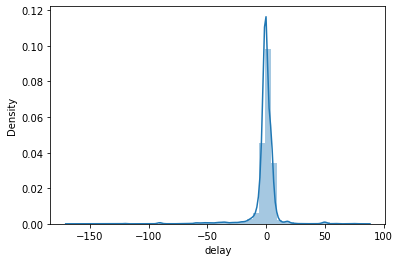

In [26]:
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.distplot(y_train)


In [27]:
# distribution -  target column ie. delay
# it is right skewed distribution

In [28]:
X_train.merge(y_train,on = X_train.index)

,key_0,name_customer,clear_date,buisness_year,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,isOpen,business_code_enc,cust_number_enc,posting_date_enc,invoice_currency_enc,cust_payment_terms_enc,delay
0,25732,WAL-MAR,2019-01-09,2019,2018-12-29,2018-12-30,2019-01-14,17093.74,2018-12-30,1.928533e+09,0,1,878,0,1,38,5
1,35918,WAL-MAR foundation,2019-01-09,2019,2018-12-29,2018-12-30,2019-01-14,14428.46,2018-12-30,1.928541e+09,0,1,878,0,1,38,5
2,17290,PUBLI us,2019-01-14,2019,2018-12-30,2018-12-30,2019-01-14,16801.80,2018-12-30,1.928542e+09,0,1,735,0,1,22,0
3,17429,WAL-MAR in,2019-01-10,2019,2018-12-30,2018-12-30,2019-01-14,38102.65,2018-12-30,1.928543e+09,0,1,878,0,1,38,4
4,42566,UNITE corporation,2019-01-15,2019,2018-12-30,2018-12-30,2019-01-14,1113.85,2018-12-30,1.928541e+09,0,1,963,0,1,22,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27388,21862,SYSCO foundation,2019-10-24,2019,2019-10-06,2019-10-08,2019-10-23,2816.45,2019-10-08,1.929976e+09,0,1,750,282,1,22,-1
27389,30368,WAL-MAR llc,2019-10-18,2019,2019-10-08,2019-10-08,2019-10-23,50145.27,2019-10-08,1.929983e+09,0,1,878,282,1,38,5
27390,25482,WAL-MAR associates,2019-10-21,2019,2019-10-08,2019-10-08,2019-10-23,1886.24,2019-10-08,1.929984e+09,0,1,878,282,1,38,2
27391,42379,BJ'S co,2019-10-24,2019,2019-10-08,2019-10-08,2019-10-23,429.79,2019-10-08,1.929984e+09,0,1,777,282,1,22,-1


<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

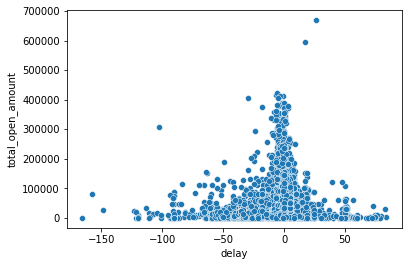

In [29]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

In [30]:
#checking outliers
Q1 = train['delay'].quantile(0.25)
Q3 = train['delay'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
print(IQR)
train['delay'] = train['delay'][~((train['delay'] < (Q1 - 1.5* IQR)) |(train['delay'] > (Q3 + 1.5 * IQR)))]

-2.0
3.0
5.0


In [31]:
train.dropna(subset=['delay'], inplace = True)

# Feature Engg

In [32]:
X_train.dtypes

name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int32
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
invoice_id                       float64
isOpen                             int64
business_code_enc                  int32
cust_number_enc                    int32
posting_date_enc                   int32
invoice_currency_enc               int32
cust_payment_terms_enc             int32
dtype: object

In [33]:
#Removing colums that are not required right now
X_train = X_train.drop(columns = ["clear_date","name_customer","isOpen","document_create_date.1","buisness_year","baseline_create_date","invoice_id","total_open_amount"])

In [34]:
X_val = X_val.drop(columns = ["clear_date","name_customer","isOpen","document_create_date.1","buisness_year","baseline_create_date","invoice_id","total_open_amount"])

In [35]:
X_test = X_test.drop(columns = ["clear_date","name_customer","isOpen","document_create_date.1","buisness_year","baseline_create_date","invoice_id","total_open_amount"])

In [36]:
X_train.dtypes

document_create_date      datetime64[ns]
due_in_date               datetime64[ns]
business_code_enc                  int32
cust_number_enc                    int32
posting_date_enc                   int32
invoice_currency_enc               int32
cust_payment_terms_enc             int32
dtype: object

In [37]:
X_test.dtypes

document_create_date      datetime64[ns]
due_in_date               datetime64[ns]
business_code_enc                  int32
cust_number_enc                    int32
posting_date_enc                   int32
invoice_currency_enc               int32
cust_payment_terms_enc             int32
dtype: object

In [38]:
# function to delete a column from train , val and test
def drop_l_e(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [39]:
#extract day,month and year
X_train['day_of_document_create_date'] = X_train['document_create_date'].dt.day
X_train['month_of_document_create_date'] = X_train['document_create_date'].dt.month
X_train['year_of_document_create_date'] = X_train['document_create_date'].dt.year

X_val['day_of_document_create_date'] = X_val['document_create_date'].dt.day
X_val['month_of_document_create_date'] = X_val['document_create_date'].dt.month
X_val['year_of_document_create_date'] = X_val['document_create_date'].dt.year


X_test['day_of_document_create_date'] = X_test['document_create_date'].dt.day
X_test['month_of_document_create_date'] = X_test['document_create_date'].dt.month
X_test['year_of_document_create_date'] = X_test['document_create_date'].dt.year

In [40]:
X_train ,X_val, X_test = drop_l_e(['document_create_date'])

In [41]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

In [42]:
X_train ,X_val, X_test = drop_l_e(['due_in_date'])

In [43]:
X_train.dtypes

business_code_enc                int32
cust_number_enc                  int32
posting_date_enc                 int32
invoice_currency_enc             int32
cust_payment_terms_enc           int32
day_of_document_create_date      int64
month_of_document_create_date    int64
year_of_document_create_date     int64
day_of_due_in_date               int64
month_of_due_in_date             int64
year_of_due_in_date              int64
dtype: object

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

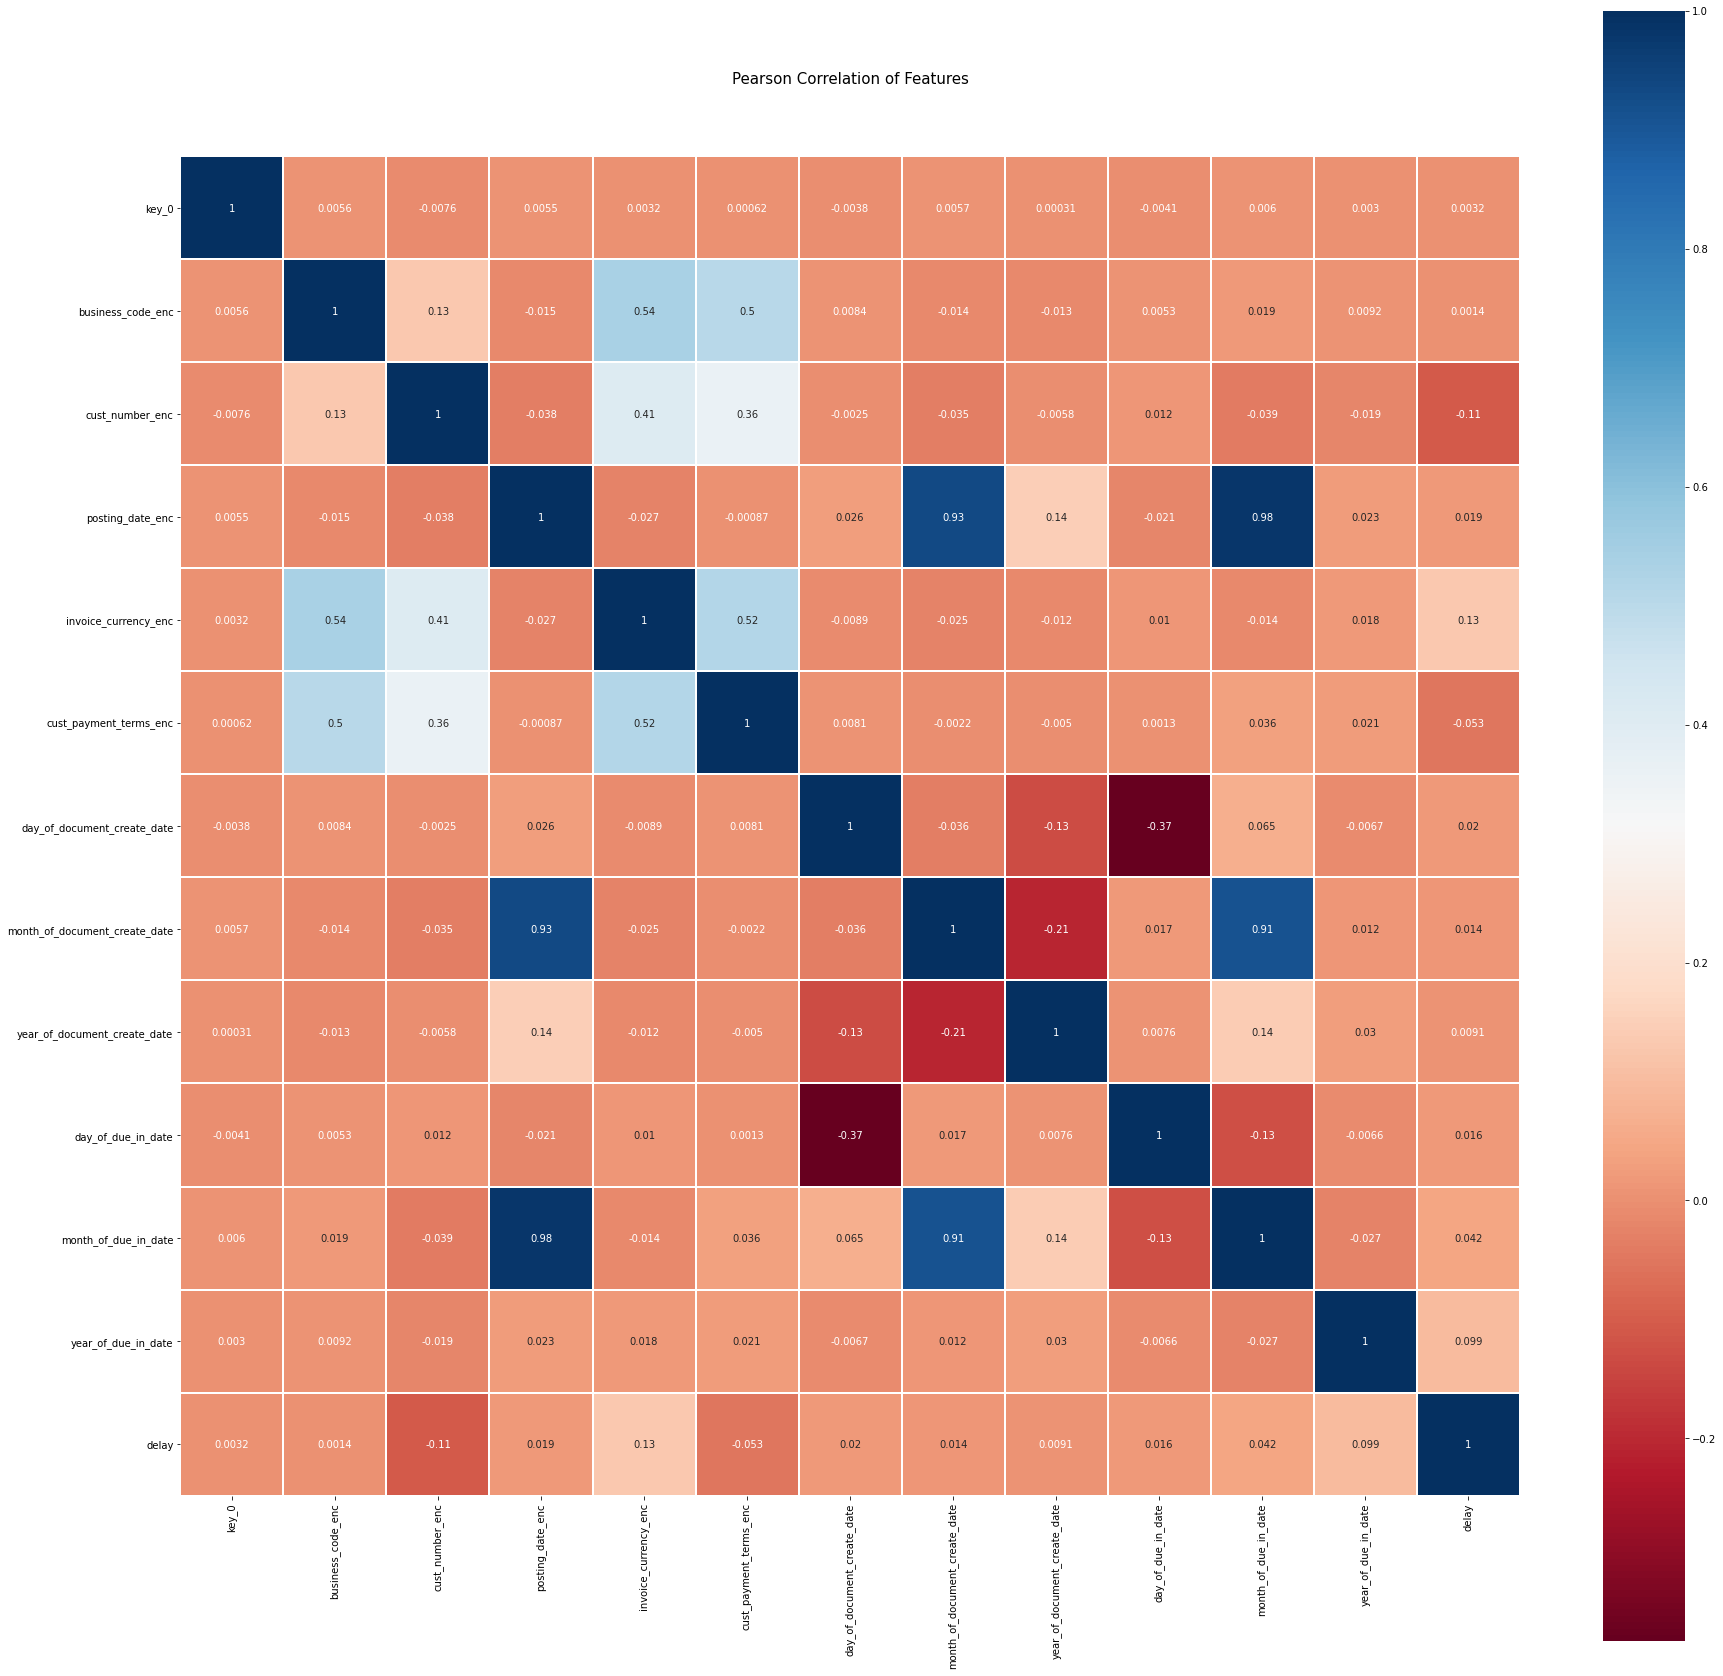

In [44]:
#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# MODELLING

In [45]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [46]:
sel.variances_

array([2.86849560e-01, 7.21376004e+04, 6.41074351e+03, 7.34944974e-02,
       1.81520494e+02, 7.89641497e+01, 7.13428458e+00, 6.56386805e-03,
       7.46678327e+01, 7.18732361e+00, 2.19034060e-04])

In [47]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_predict = base_model.predict(X_val)

In [49]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

6.95548706042513

In [50]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

#(abs(met.Predicted-met.Actuals)/met.Actuals).mean()
met

,Predicted,Actuals
0,1.068983,-4
1,-2.173525,2
2,-6.658465,1
3,0.330101,5
4,-0.406082,-1
...,...,...
5865,-1.957892,-3
5866,-2.176508,-1
5867,0.197726,7
5868,-4.024397,0


In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [52]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [53]:
y_predict2 = regressor.predict(X_val)

In [54]:
mean_squared_error(y_val, y_predict2, squared=False)

5.5452159359616635

In [55]:
test.isna().sum()

name_customer                0
clear_date                9706
buisness_year                0
document_create_date         0
document_create_date.1       0
due_in_date                  0
total_open_amount            0
baseline_create_date         0
invoice_id                   0
isOpen                       0
business_code_enc            0
cust_number_enc              0
posting_date_enc             0
invoice_currency_enc         0
cust_payment_terms_enc       0
dtype: int64

In [56]:
X_test = test.drop(['clear_date'],axis=1)
X_test

# ALSO LETS DROP clear_date FROM TEST ITSELF
test.drop(['clear_date'], inplace =True,axis=1)

In [57]:
X_test.dtypes

name_customer                     object
buisness_year                      int32
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
invoice_id                       float64
isOpen                             int64
business_code_enc                  int32
cust_number_enc                    int32
posting_date_enc                   int32
invoice_currency_enc               int32
cust_payment_terms_enc             int32
dtype: object

In [58]:
X_test = test.drop(columns = ["name_customer"])

In [59]:
#extract day,month and year 
X_test['day_of_document_create_date'] = X_test['document_create_date'].dt.day
X_test['month_of_document_create_date'] =X_test['document_create_date'].dt.month
X_test['year_of_document_create_date'] = X_test['document_create_date'].dt.year

In [60]:
X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] =X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

In [61]:
X_test.dtypes

buisness_year                             int32
document_create_date             datetime64[ns]
document_create_date.1           datetime64[ns]
due_in_date                      datetime64[ns]
total_open_amount                       float64
baseline_create_date             datetime64[ns]
invoice_id                              float64
isOpen                                    int64
business_code_enc                         int32
cust_number_enc                           int32
posting_date_enc                          int32
invoice_currency_enc                      int32
cust_payment_terms_enc                    int32
day_of_document_create_date               int64
month_of_document_create_date             int64
year_of_document_create_date              int64
day_of_due_in_date                        int64
month_of_due_in_date                      int64
year_of_due_in_date                       int64
dtype: object

In [62]:
X_test = X_test.drop(columns = ["document_create_date","due_in_date","isOpen","document_create_date.1","buisness_year","baseline_create_date","invoice_id","total_open_amount"])

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27393 entries, 25732 to 39230
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   business_code_enc              27393 non-null  int32
 1   cust_number_enc                27393 non-null  int32
 2   posting_date_enc               27393 non-null  int32
 3   invoice_currency_enc           27393 non-null  int32
 4   cust_payment_terms_enc         27393 non-null  int32
 5   day_of_document_create_date    27393 non-null  int64
 6   month_of_document_create_date  27393 non-null  int64
 7   year_of_document_create_date   27393 non-null  int64
 8   day_of_due_in_date             27393 non-null  int64
 9   month_of_due_in_date           27393 non-null  int64
 10  year_of_due_in_date            27393 non-null  int64
dtypes: int32(5), int64(6)
memory usage: 2.0 MB


In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 8218 to 32781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   business_code_enc              9706 non-null   int32
 1   cust_number_enc                9706 non-null   int32
 2   posting_date_enc               9706 non-null   int32
 3   invoice_currency_enc           9706 non-null   int32
 4   cust_payment_terms_enc         9706 non-null   int32
 5   day_of_document_create_date    9706 non-null   int64
 6   month_of_document_create_date  9706 non-null   int64
 7   year_of_document_create_date   9706 non-null   int64
 8   day_of_due_in_date             9706 non-null   int64
 9   month_of_due_in_date           9706 non-null   int64
 10  year_of_due_in_date            9706 non-null   int64
dtypes: int32(5), int64(6)
memory usage: 720.4 KB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 8218 to 32781
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           9706 non-null   object        
 1   buisness_year           9706 non-null   int32         
 2   document_create_date    9706 non-null   datetime64[ns]
 3   document_create_date.1  9706 non-null   datetime64[ns]
 4   due_in_date             9706 non-null   datetime64[ns]
 5   total_open_amount       9706 non-null   float64       
 6   baseline_create_date    9706 non-null   datetime64[ns]
 7   invoice_id              9706 non-null   float64       
 8   isOpen                  9706 non-null   int64         
 9   business_code_enc       9706 non-null   int32         
 10  cust_number_enc         9706 non-null   int32         
 11  posting_date_enc        9706 non-null   int32         
 12  invoice_currency_enc    9706 non-null   int3

In [66]:
test = test.drop(columns = ["name_customer","isOpen","document_create_date.1","buisness_year","baseline_create_date","invoice_id","total_open_amount"])

In [67]:
#extract day,month and year
test['day_of_document_create_date'] = test['document_create_date'].dt.day
test['month_of_document_create_date'] = test['document_create_date'].dt.month
test['year_of_document_create_date'] = test['document_create_date'].dt.year

In [68]:
test['day_of_due_in_date'] = test['due_in_date'].dt.day
test['month_of_due_in_date'] = test['due_in_date'].dt.month
test['year_of_due_in_date'] = test['due_in_date'].dt.year


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27393 entries, 25732 to 39230
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   business_code_enc              27393 non-null  int32
 1   cust_number_enc                27393 non-null  int32
 2   posting_date_enc               27393 non-null  int32
 3   invoice_currency_enc           27393 non-null  int32
 4   cust_payment_terms_enc         27393 non-null  int32
 5   day_of_document_create_date    27393 non-null  int64
 6   month_of_document_create_date  27393 non-null  int64
 7   year_of_document_create_date   27393 non-null  int64
 8   day_of_due_in_date             27393 non-null  int64
 9   month_of_due_in_date           27393 non-null  int64
 10  year_of_due_in_date            27393 non-null  int64
dtypes: int32(5), int64(6)
memory usage: 2.0 MB


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 8218 to 32781
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   document_create_date           9706 non-null   datetime64[ns]
 1   due_in_date                    9706 non-null   datetime64[ns]
 2   business_code_enc              9706 non-null   int32         
 3   cust_number_enc                9706 non-null   int32         
 4   posting_date_enc               9706 non-null   int32         
 5   invoice_currency_enc           9706 non-null   int32         
 6   cust_payment_terms_enc         9706 non-null   int32         
 7   day_of_document_create_date    9706 non-null   int64         
 8   month_of_document_create_date  9706 non-null   int64         
 9   year_of_document_create_date   9706 non-null   int64         
 10  day_of_due_in_date             9706 non-null   int64         
 11  month_of_due_

In [71]:
test = test.drop(columns = ["document_create_date","due_in_date"])

In [72]:
final_result = regressor.predict(test)

In [74]:
final_result = pd.Series(final_result,name='delay')

In [75]:
dataset.reset_index(drop=True,inplace=True)

In [76]:
Final = test.merge(final_result , on = test.index )
Final

,key_0,business_code_enc,cust_number_enc,posting_date_enc,invoice_currency_enc,cust_payment_terms_enc,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date,delay
0,8218,1,735,421,1,22,27,2,2020,13,3,2020,-1.130598
1,41407,1,735,421,1,22,27,2,2020,13,3,2020,-1.130598
2,44723,1,878,421,1,38,26,2,2020,13,3,2020,1.729214
3,5186,1,456,421,1,22,25,2,2020,13,3,2020,-1.130598
4,41378,1,783,421,1,22,26,2,2020,13,3,2020,-1.130598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,46674,1,621,500,1,11,19,5,2020,29,5,2020,-10.133676
9702,15155,1,877,501,1,22,19,5,2020,4,6,2020,-1.130598
9703,16607,1,849,502,1,34,21,5,2020,20,6,2020,-10.740000
9704,11652,1,1382,502,1,22,16,5,2020,5,6,2020,-1.130598


In [77]:
Final['delay'] = Final['delay'].astype(int)

In [78]:
Final['Delay']=pd.to_timedelta(Final['delay'], unit='D')

In [79]:
Final['due_in_date'] = pd.to_datetime(dataset['due_in_date'], format='%Y%m%d')

In [80]:
Final['predicted_payment_date'] =Final['due_in_date']+Final['Delay']

In [81]:
#bucketing
bins=[-1000,0,15,30,45,60,75]
group_names=['payment before due date','0-15 Days','16-30 Days','31-45 Days','45-60 Days','>60']
Final['Delay_days']=pd.cut(Final['delay'],bins,labels= group_names)

In [ ]:
# End result

In [82]:
Final = Final.drop(columns = ["delay","Delay"])
Final

,key_0,business_code_enc,cust_number_enc,posting_date_enc,invoice_currency_enc,cust_payment_terms_enc,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date,due_in_date,predicted_payment_date,Delay_days
0,8218,1,735,421,1,22,27,2,2020,13,3,2020,2019-01-14,2019-01-13,payment before due date
1,41407,1,735,421,1,22,27,2,2020,13,3,2020,2019-01-14,2019-01-13,payment before due date
2,44723,1,878,421,1,38,26,2,2020,13,3,2020,2019-01-14,2019-01-15,0-15 Days
3,5186,1,456,421,1,22,25,2,2020,13,3,2020,2019-01-14,2019-01-13,payment before due date
4,41378,1,783,421,1,22,26,2,2020,13,3,2020,2019-01-14,2019-01-13,payment before due date
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,46674,1,621,500,1,11,19,5,2020,29,5,2020,2019-04-25,2019-04-15,payment before due date
9702,15155,1,877,501,1,22,19,5,2020,4,6,2020,2019-04-25,2019-04-24,payment before due date
9703,16607,1,849,502,1,34,21,5,2020,20,6,2020,2019-05-11,2019-05-01,payment before due date
9704,11652,1,1382,502,1,22,16,5,2020,5,6,2020,2019-04-25,2019-04-24,payment before due date
